# 0. Imports

In [1]:
import pandas as pd
import requests as r
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import fixed
import streamlit
import html

In [2]:
data = pd.read_csv('data/kc_house_data.csv')

# 1. Data Preparation

## 1.1 Adjusting Datatypes

This very important step is to guarantee that data is being interpreted correctly from now on.

In [3]:
#Copy the dataframe to preserve raw data
df1 = data.copy()

In [4]:
#Check the datatypes
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
#need to adjust dates from object to date
df1['date'] =  pd.to_datetime( df1['date'], format='%Y-%m-%d' )
#the IDs, even though being numbers, should behave as strings
df1['id'] = df1['id'].astype(str)
#same for zip codes
df1['zipcode'] = df1['zipcode'].astype(str)

In [6]:
#See if it is correct now
df1.dtypes

id                       object
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [7]:
# Supress Scientific Notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

# 2. Tasks and Business Questions

<p> These are some simulated questions and tasks one can usually perform in data analysis projects. </p>
<p> Feel free to use as a reference </p>


## 2.1 Basic Operations Tasks

### 2.1.1 How many houses are available for purchase?

In [8]:
#Considering that the 'id' column goes for a unique identifier, we should count them
unique_houses = df1['id'].nunique()

print ('There are {} available houses for sale.'.format(unique_houses))

There are 21436 available houses for sale.


### 2.1.2 How many attributes do the houses have?

In [9]:
#Considering that 'id' and 'date' are not actually attributes
num_attributes = len (df1.columns) - 2

print ('There are {} different attributes'.format (num_attributes))

There are 19 different attributes


### 2.1.3 What attributes are those?

In [10]:
# I will drop the 'id' and 'date' columns and show the remaining ones.
df2 = df1.drop(['id', 'date'], axis = 1)

print (df2.columns.tolist())

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


### 2.1.4 What is the most expensive house?

In [11]:
#Here, we should tell not only the maximum price, but also the corresponding ID.
#So, first, I will order the dataframe according to the price.
df2 = df1[['id', 'price']].sort_values ('price', ascending = False)

#Now, I will locate the first item in the data frame, that should be the answer to this question
most_expensive = df2.loc[0,'id']

print ('The most expensive house is the one which ID is {}.'.format(most_expensive))

The most expensive house is the one which ID is 7129300520.


### 2.1.5 Which house has the most bedrooms?

In [12]:
#First, we simplify selecting the 'id' and 'bedrooms' columns
df2 = df1[['id','bedrooms']]

#Now, let's get what is the highest number os bedrooms a house can have.
max_bedrooms = df2['bedrooms'].max()

# It is prudent to suspect that more than one house can have the maximum number os bedrooms
# So, now we filter according to max_bedrooms
max_bedrooms_houses = df2.loc[df2['bedrooms'] == max_bedrooms, :]
max_bedrooms_houses


,id,bedrooms
15870,2402100895,33


### 2.1.6 How many bedrooms are there available in the dataset?

In [13]:
# Let's sum the bedrooms column
print ('The number of bedrooms in the dataset is {}'.format(df1['bedrooms'].sum()))

The number of bedrooms in the dataset is 72854


### 2.1.7 How many houses have 2 bathrooms?

In [14]:
#First, let's find and reduce the dataset using the condition 
df2 = df1.loc[df1['bathrooms'] == 2, :]

#Important: Let's avoid duplicated IDs using the nunique method to count the houses.
print('There are {} houses with 2 bathrooms'.format(df2['id'].nunique()))

There are 1913 houses with 2 bathrooms


### 2.1.8 What is the average house price in the dataset?

In [15]:
# Calculate the average value for the 'price' column
avg_price = np.round(df1['price'].mean(), 2)

print ('The average price is $ {}'.format(avg_price))

The average price is $ 540088.14


### 2.1.9 What is the average house price for homes with 2 bathrooms?

In [16]:
# First, select the houses with 2 bathrooms.
df2 = df1.loc[data['bathrooms'] == 2, :]

# Now, we find the average price.
avg_price = np.round(df2['price'].mean(), 2)


print ('There average price is ${} for houses with 2 bathrooms'.format(avg_price))

There average price is $457889.72 for houses with 2 bathrooms


### 2.1.10 What is the minimum price among houses with 3 bedrooms?

In [17]:
# First, select the houses with 3 bedrooms
df2 = df1.loc[df1['bedrooms'] == 2, :]

#Now we find the minimum price.
min_price = df2['price'].min()

print ('The minimum price is ${} for houses with 3 bedrooms'.format(min_price))

The minimum price is $78000.0 for houses with 3 bedrooms


### 2.1.11 How many houses have over 300 square meters in the living room?

In [18]:
#First, we select the houses with over 300 square meters in the living room
#Important: 300 m2 = 3229 sqft
df2 = df1.loc[df1['sqft_living'] > 3229]

#Now, we count
print('There are {} houses with living rooms over 300 m2'.format(df2['id'].nunique()))

There are 2251 houses with living rooms over 300 m2


### 2.1.12 How many houses have over 2 floors?

In [19]:
# First, select houses with 'floors' > 2.
df2 = df1.loc[df1['floors'] > 2]

# Count the number of unique IDs remaining.
print ('There are {} houses with over 2 floors.'.format(df2['id'].nunique()))

There are 780 houses with over 2 floors.


### 2.1.13 How many houses are waterfront?

In [20]:
# First, select houses with 'waterfront' =1.
df2 = df1.loc[df1['waterfront'] == 1]

# Count the number of unique IDs remaining.
print ('There are {} waterfront houses in the dataframe'.format(df2['id'].nunique()))

There are 163 waterfront houses in the dataframe


### 2.1.14 From these waterfront houses, how many have 3 bedrooms?

In [21]:
# First, select houses with 'waterfront' = 1 AND 'bedrooms' = 3.
df2 = df1.loc[(df1['waterfront'] == 1) & (df1['bedrooms'] == 3)]

# Count the number of unique IDs remaining
print ('There are {} waterfront houses with 3 bedrooms'.format(df2['id'].nunique()))

There are 64 waterfront houses with 3 bedrooms


### 2.1.15 From the houses that have living rooms over 300 square meters, how many have more than 2 bathrooms?

In [22]:
#First, select houses with over 300 square meters in their living rooms and more than 2 bathrooms
#Important: 300 m2 = 3229 sqft
df2 = df1.loc[((df1['sqft_living'] > 3229) & (df1['bathrooms'] > 2))]

#Count the number os unique IDs remaining
print ('There are {} houses with living rooms larger than 300 square meters and more than 2 bathrooms'.format(df2['id'].nunique()))



There are 2194 houses with living rooms larger than 300 square meters and more than 2 bathrooms


## 2.2 Data Manipulation Tasks

### 2.2.0 Checkpoint

In [23]:
df2 = df1.copy()

### 2.2.1 Create a new column called "house_age"

<ul>
<li>If 'date' is equal or later than 2015-01-01 -> "new_house"</li>
<li>If 'date' is earlier than 2015-01-01 -> "old_house"</li>
</ul>

In [24]:
#First, create a new column called "house_age", and fill it with NAs
df2['house_age'] = 'NA'
df2.loc[df2['date'] >= '2015-01-01', 'house_age'] = 'new_house'
df2.loc[df2['date'] < '2015-01-01', 'house_age'] = 'old_house'
df2[['id', 'date','house_age']].sample(5)

,id,date,house_age
14816,1525059261,2015-05-05,new_house
12281,9191200435,2014-11-13,old_house
11311,2158900140,2014-09-05,old_house
11243,2255500060,2015-02-18,new_house
19999,3566800485,2015-02-23,new_house


### 2.2.2 Create a new column called dormitory type

The mission is to evaluate the apartament type according to the number os bedrooms. <br>
Criteria:</br>
<ul>
    <li>0 or 1 dormitory -> studio</li>
    <li>2 dormitories -> apartment</li>
    <li>more than 2 dormitories -> house</li>
</ul>

In [25]:
#First, I call every place 'house' in a new columns called dormitory_type
#Then, for the conditions above, I apply the conditions as below
df2['dormitory_type'] = 'house'
df2.loc[df2['bedrooms'] <= 1, 'dormitory_type'] = 'studio'
df2.loc[df2['bedrooms'] == 2, 'dormitory_type'] = 'apartment'
df2[['id', 'bedrooms', 'dormitory_type']].sample(5)

,id,bedrooms,dormitory_type
4701,1169000057,6,house
9653,1402600110,4,house
6391,9834201470,2,apartment
9010,2675600025,3,house
4170,9294300495,4,house


### 2.2.3 Create a new column called "condition_type"

The mission is to classify the houses according their 'condition'. <br>
Criteria:</br>
<ul>
    <li> If 'condition' <= 2                    -> 'bad'</li>
    <li> If 'condition'  = 3 or 'condition' = 5 -> 'regular'</li>
    <li> If 'condition' >= 5                    -> 'good'</li>
</ul>

In [26]:
#First, guarantee we are dealing with integers here.
df2['condition'] = df2['condition'].astype(int)

#Here I will use a lambda function to assess the lines.
df2['condition_type']  = df2['condition'].apply(lambda x: 'bad' if x <= 2 
                                                                else 'regular' if ((x >= 3) & (x <= 4))
                                                                else 'good')

df2[['condition', 'condition_type']].sample(10)

,condition,condition_type
20532,3,regular
16613,3,regular
12244,4,regular
2456,4,regular
6667,3,regular
1110,3,regular
15495,3,regular
514,5,good
3813,3,regular
14951,3,regular


### 2.2.4 Modify the dtype of 'condition' to STRING

In [27]:
#So, as per the last exercise, the column is a int
df2[['id', 'condition']].dtypes

id           object
condition     int64
dtype: object

In [28]:
#I will use astype to change it to str
df2['condition'] = df2['condition'].astype(str)

In [29]:
#Checking, and it is ok
df2[['id', 'condition']].dtypes

id           object
condition    object
dtype: object

### 2.2.5 Delete the following columns: "sqft_living15" and "sqft_lot15"

In [30]:
#Here we will simply drop the columns using drop
df2 = df2.drop( ['sqft_living15', 'sqft_lot15'], axis=1 )

### 2.2.6 Change the data type of 'yr_built' to DATE

In [31]:
# Here I will use the to_datetime method from pandas to format the year.
df2['yr_built'] = pd.to_datetime( df2['yr_built'], format='%Y' )

### 2.2.7 Change the data type of 'yr_renovated' to DATE

In [32]:
# It is important to notice that there is a chance that the house may have never been renovated.
# Therefore, the latest renovation date should be the same as the built date for these cases.
not_renovated_check = df2[df2['yr_renovated'] == 0].shape[0]

print ('There are {} houses that dont have a renovation date'.format(not_renovated_check))

There are 20699 houses that dont have a renovation date


In [33]:
#Ok, so first let's convert everything applying lambda
df2['yr_renovated'] = df2['yr_renovated'].apply( lambda x: pd.to_datetime( x, format='%Y') if x > 0 else x )

In [39]:
#Then, for all lines, let's compare this condition using a for loop and fill the zeros with the built date

for i in range(len (df2)):
    if df2.loc[i, 'yr_renovated'] == 0:
       df2.loc[i, 'yr_renovated'] = df2.loc[i, 'yr_built']

### 2.2.8 What is the oldest house?

In [51]:
min_date = df2['yr_built'].min()
print ('The oldest house was built in {}.'.format(min_date.year))

The oldest house was built in 1900.


### 2.2.9 What is the earliest renovation in the dataset?

In [50]:
#Here we have to remember the transformation we did above.
#We should find the earliest date as long as it is not equal to the built date

min_date = df2['yr_built'].max()
for i in range(len (df2)):
    if ((df2.loc[i, 'yr_renovated'] != df2.loc[i, 'yr_built']) & (df2.loc[i, 'yr_renovated'] < min_date)):
        min_date = df2.loc[i, 'yr_renovated']
    else:
        min_date = min_date

print ('The earliest renovation was in {}.'.format(min_date.year))

The earliest renovation was in 1934.


### 2.2.10 How many houses have 2 floors?

In [63]:
#We should count the houses using a conditional sentence but we should remember that there may be duplicates
#So, considering that each ID goes for a house, we should have
two_floors = df2.loc[df2['floors'] == 2, 'id'].nunique('id')

print('There are {} houses with 2 floors.'.format(two_floors))

There are 8209 houses with 2 floors.


### 2.2.11 How many houses have a 'regular' condition?


In [66]:
#We should count the houses using a conditional sentence but we should remember that there may be duplicates
#So, considering that each ID goes for a house, we should have
regular_houses = df2.loc[df2['condition_type']=='regular', 'id'].nunique('id')

print ('There are {} houses considered "regular".'.format(regular_houses))

There are 19556 houses considered "regular".


### 2.2.12 How many houses have a 'bad' condition and are waterfront?

In [70]:
#We should count the houses using a conditional sentence but we should remember that there may be duplicates
#So, considering that each ID goes for a house, we should have

bad_waterfront_houses = df2.loc[((df2['condition_type']=='bad') & (df2['waterfront'] == 1)) , 'id'].nunique('id')

print ('There are {} bad houses with a water view.'.format(bad_waterfront_houses))

There are 2 bad houses with a water view.


### 2.2.13 How many houses are "good" and considered "new_houses"?

In [73]:
#We should count the houses using a conditional sentence but we should remember that there may be duplicates
#So, considering that each ID goes for a house, we should have
good_new_houses = df2.loc[((df2['condition_type']=='good') & (df2['house_age'] == 'new_house')) , 'id'].nunique('id')

print ('There are {} good and new houses.'.format(good_new_houses))

There are 421 good and new houses.


### 2.2.14 What is the most expensive "studio" house?

In [112]:
#First, we filter the studio apartments and rank them according to their price
most_expensive_studio = df2.loc[df2['dormitory_type'] == 'studio', :].sort_values(by = 'price', ascending = False)
most_expensive_studio = most_expensive_studio[['id', 'price']]

#Next, we pick the first element in the rank
print ('The most expensive studio is the one which ID is {}.'.format(most_expensive_studio.iloc[0, 0]))

The most expensive studio is the one which ID is 2954400190.


### 2.2.15 Select the following columns using different methods: 'id', 'date', 'price', 'floors', 'zipcode'

<ul>
<li>By the name of the columns</li>
<li>By the indexes</li>
<li>By line indexes and columns names</li>
<li>Boolean indexes</li>
</ul>

In [137]:
#By the name of the columns
df3 = df2[['id', 'date', 'price', 'floors', 'zipcode']]
df3.sample(3)

,id,date,price,floors,zipcode
11055,6392000570,2014-11-12,399000.00,1.00,98115
3637,4249000100,2015-04-14,803000.00,2.00,98052
18810,3904960690,2015-04-17,612000.00,2.00,98029


In [138]:
#By the indexes
df4 = df2.iloc[:, [0, 1, 2, 7, 16]]
df4.sample(3)

,id,date,price,floors,zipcode
12988,9476200150,2015-04-16,231500.00,1.00,98056
19580,6821102170,2014-05-07,794154.00,1.00,98199
14976,1394300005,2014-05-07,361280.00,1.00,98126


In [139]:
#By line indexes and columns names
df5 = df2.loc[:, ['id', 'date', 'price', 'floors', 'zipcode']]
df5.sample(3)

,id,date,price,floors,zipcode
8287,4310701577,2014-05-09,382000.00,3.00,98103
14263,9547200835,2015-04-02,775000.00,1.50,98115
8915,7977201065,2014-11-04,350000.00,1.00,98115


In [142]:
#By boolean indexes
i = [True, True, True, False, False, False, False, True,False,False,False,False,False,False,False,False, True, False,False,False,False,False ]
df6 = df2.iloc[0:10, i]
df6.sample(3)

,id,date,price,floors,zipcode
1,6414100192,2014-12-09,538000.00,2.00,98125
6,1321400060,2014-06-27,257500.00,2.00,98003
4,1954400510,2015-02-18,510000.00,1.00,98074


## 2.3 Data Structures Tasks

In [ ]:
### 2.3.0 Checkpoint

### 2.3.1 Create bars graph for the sum of prices by number of bedrooms

<BarContainer object of 13 artists>

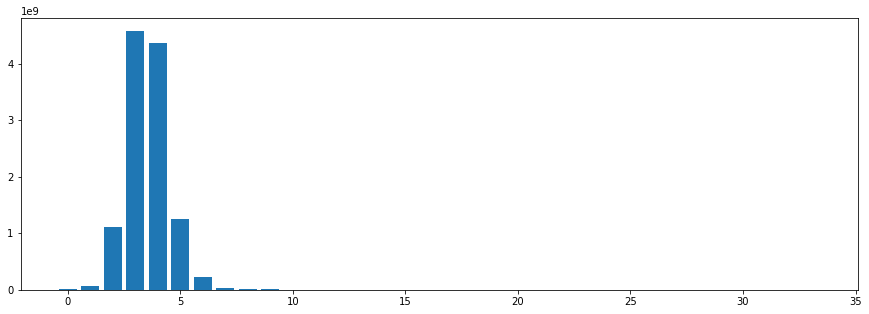

In [144]:
#The first mission is to group the places by the number os bedrooms. Then, I sum them and plot in a graph.
rooms_grouped = df2['price'].groupby(df2['bedrooms']).sum().reset_index()
#Adjust figure size to a better view
plt.figure(figsize = (15,5))
ax = plt.bar(rooms_grouped['bedrooms'], rooms_grouped['price'] )
ax

### 2.3.2 Create bars graph for average price by built year

<BarContainer object of 116 artists>

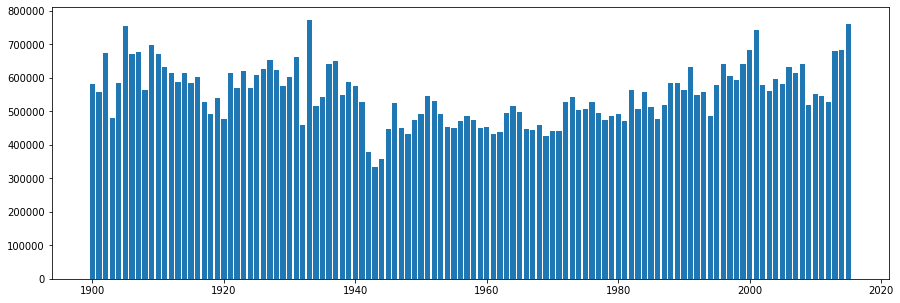

In [37]:
#Same logic as the previous exercise
yr_built_grouped = df1['price'].groupby(df1['yr_built']).mean().reset_index()
#Adjust figure size to a better view
plt.figure(figsize = (15,5))
ax = plt.bar(yr_built_grouped['yr_built'], yr_built_grouped['price'])
ax

### 2.3.3 Create bars graph for average price by dormitory type

In [143]:
dorm_type_grouped = df1['price'].groupby(df1['dormitory_type']).mean().reset_index()
ax = plt.bar(dorm_type_grouped['dormitory_type'], dorm_type_grouped['price'] )
ax

KeyError: 'dormitory_type'

### 2.3.4 Create lines graph showing the evolution of the avg of prices by the year renovated since 1930

In [ ]:
yr_renov_group = df1['price'].groupby(df1['yr_renovated']).mean().reset_index()
yr_renov_group = yr_renov_group.loc[yr_renov_group['yr_renovated']>=1930, :]
plt.figure(figsize = (20,15))
gr5 = plt.plot(yr_renov_group['yr_renovated'], yr_renov_group['price'])
gr5

### 2.3.5 Create a table showing the avg price per yr build and dormitory type

In [ ]:
#Simply grouping 
tb = df1[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean()
tb

### 2.3.6 Create a Dashboard with Q2, Q3 and Q4 1 row 2 columns

In [ ]:
fig = plt.figure(figsize = (20,5)) #define the size of the plot
specs = gridspec.GridSpec(ncols = 3, nrows = 1, figure = fig) #set the specs for the plot, number of columns and rows, and apply the figure setting

ax1 = fig.add_subplot(specs[0, 0]) #First row, whole row
ax2 = fig.add_subplot(specs[0, 1]) #Second row first column
ax3 = fig.add_subplot(specs[0, 2]) #Second row first column

ax1.bar(rooms_grouped['bedrooms'], rooms_grouped['price'] )
ax2.bar(yr_built_grouped['yr_built'], yr_built_grouped['price'])
ax3.bar(dorm_type_grouped['dormitory_type'], dorm_type_grouped['price'])



### 2.3.7 Create a Dashboard with Q2 and Q4 2 columns

In [ ]:
fig = plt.figure(figsize = (20,5))
specs = gridspec.GridSpec(ncols = 2, nrows = 1, figure = fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])


ax1.bar(rooms_grouped['bedrooms'], rooms_grouped['price'] )
ax2.bar(dorm_type_grouped['dormitory_type'], dorm_type_grouped['price'] )

### 2.3.8 Create a Dashboard with Q3 and Q5 2 rows

In [ ]:
fig = plt.figure(figsize = (20,5))
specs = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[1, 0])

ax1.plot(yr_renov_group['yr_renovated'], yr_renov_group['price'])
ax2.bar(yr_built_grouped['yr_built'], yr_built_grouped['price'])


### 2.3.9 Create a map where the size of the points are the number of bedrooms

In [ ]:
df1.columns

In [ ]:
houses = df1[['id', 'lat', 'long', 'bedrooms']] #create a more simple dataframe for this
fig = px.scatter_mapbox (houses, #inclui o dataframe
                          lat = 'lat',
                          lon = 'long',
                          size = 'bedrooms',
                          color_continuous_scale = px.colors.cyclical.IceFire,
                          size_max = 20,
                          zoom = 10)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height = 600)

# 3 Control Structures

## 3.0 Checkpoint

In [ ]:
df2 = pd.read_csv( 'kc_house_data.csv' )

In [ ]:
df2.columns

## 3.1 Average price per level
#### Level 0: Price between 0 and 321.950
#### Level 1: Price between 321.950 and 450.000
#### Level 2: Price between  450.000 and 645.000
#### Level 3: Price over 654.000

In [ ]:
df2['price_level'] = 0
# primeiro vou montar as condicoes 
#agora vou juntar essas condicões, lembrando dos parenteses
#agora eu vou pegar as linhas com essa condicão (copiar e colar o de cima), para a coluna 'price_level'
df2.loc[((df2['price'] >= 0) & (df2['price'] < 321950)), 'price_level'] = 'level_0'
df2.loc[((df2['price'] >= 321950) & (df2['price'] < 450000)), 'price_level'] = 'level_1'
df2.loc[((df2['price'] >= 450000) & (df2['price'] < 645000)), 'price_level'] = 'level_2'
df2.loc[((df2['price'] >= 645000)), 'price_level'] = 'level_3'



In [ ]:
df2.sample(20)

In [ ]:
aux = df2.groupby('price_level').mean().sort_values(by='price', ascending = False).reset_index()
aux[['price_level', 'price']]

## 3.2 Average living room size, per Size categories
#### Size 0: Size between 0 and 1.427 sqft
#### Size 1: Size between 1.427 and 1.910 sqft
#### Size 2: Size between  1.910 and 2.550 sqft
#### Size 3: Size over 2.550 sqft

In [ ]:
df2 = pd.read_csv( 'kc_house_data.csv' )
df2.dtypes

In [ ]:
df2['living_size'] = 0
for i in range(len(df2)):
    if (df2.loc[i, 'sqft_living'] > 0 ) & (df2.loc[i, 'sqft_living'] < 1427):
        df2.loc[i, 'living_size'] = 'size_0'  
            
    elif ((df2.loc[i, 'sqft_living'] >=1427) & (df2.loc[i, 'sqft_living'] < 1910)):
        df2.loc[i, 'living_size'] = 'size_1'      
    
    elif ((df2.loc[i, 'sqft_living'] >=1910) & (df2.loc[i, 'sqft_living'] < 2550)):
        df2.loc[i, 'living_size'] = 'size_2'            
    
    else:      
        df2.loc[i, 'living_size'] = 'size_3'            
    

In [ ]:
df2.shape

## 3.3 Add the following information in the original dataset
#### Place ID
#### OSM Type (Open Street Map Type)
#### Country
#### Country Code

In [ ]:
from geopy.geocoders import Nominatim

#Initialize Nominatim API

geolocator = Nominatim(user_agent = 'testing_my_model_please_let_me')

#Create empty rows

df2['Place_ID'] = 'NA'
df2['OSM_Type'] = 'NA'
df2['Country'] = 'NA'
df2['Country_code'] = 'NA'

#so, for the dataframe, I will run row by row 
#Because this is just a training, I will do only the first 20 rows

for i in range(20):
    
    #have to ask the API for the data using lat and lon infos
    #This data is in df2.loc[i, 'lat'] and df2.loc[i, 'long']
    #And need to concatenate these
    latlong = str(df2.loc[i, 'lat']) +','+ str(df2.loc[i, 'long'])
    #Then ask the API
    response = geolocator.reverse(latlong).raw
    #Get the raw data that contains the details such as PLACE_ID, OSM_Type, Country and Country_code
    df2.loc[i, 'Place_ID']     = response['place_id']    
    df2.loc[i, 'OSM_Type']     = response['osm_type']
    df2.loc[i, 'Country']      = response['address']['country']
    df2.loc[i, 'Country_code'] = response['address']['country_code']

In [ ]:
#save the new data
df3 = df2.copy()

In [ ]:
df3.head(100)

## 3.4 Create a Map and add the following filters to it
#### Minimum living area size
#### Minimum number of bathrooms
#### Max price 
#### Max basement size
#### Filter house conditions
#### Filter Year Built

In [ ]:
    #Create the widgets

    style = {'description_width':'initial'}

    #House Conditions
    f_house_conditions = widgets.Dropdown(options = df3['condition'].unique().tolist(),
                                         value=1,
                                         description='House Condition',
                                         disable=False)

    #Living Area Size
    f_living_size = widgets.IntSlider(value = df3['sqft_living'].min(), 
                                    min = df3['sqft_living'].min(), 
                                    max = df3['sqft_living'].max(), 
                                    step = 1,
                                    description = 'Max Living Size:',
                                    disable = False, 
                                    style = style)
    #Bathrooms
    f_bathrooms = widgets.Dropdown(options = df3['bathrooms'].unique().tolist(), 
                                    min = df3['bathrooms'].min(), 
                                    max = df3['bathrooms'].max(), 
                                    description = 'Max Bathrooms:',
                                    disable = False)

    #Price
    f_price = widgets.IntSlider(value = df3['price'].max(), 
                                    min = df3['price'].min(), 
                                    max = df3['price'].max(), 
                                    step = 1,
                                    description = 'Max Price:',
                                    disable = False, 
                                    style = style)

    #Basement Size
    f_basement_size = widgets.IntSlider(value = df3['sqft_basement'].max(), 
                                    min = df3['sqft_basement'].min(), 
                                    max = df3['sqft_basement'].max(), 
                                    step = 1,
                                    description = 'Max Basement Size:',
                                    disable = False, 
                                    style = style)

    #Year_built
    f_year_built = widgets.IntRangeSlider( value=[df3['yr_built'].min(), df3['yr_built'].max()],
                                          min=df3['yr_built'].min(),
                                          max=df3['yr_built'].max(),
                                          step=1,
                                          description='Year Built:',
                                          disabled=False,
                                          continuous_update=False,
                                          orientation='horizontal',
                                          readout=True,
                                          readout_format='d'
                                         )

#Filter the Dataframe according to filter selection


In [ ]:
f_year_built.min

In [ ]:
r = range(f_year_built.min, f_year_built.max)

In [ ]:
def update_map (df, house_conditions, living_size, bathrooms, price, basement_size):
    houses = df[((df['condition'] == house_conditions) &
                   (df['sqft_living'] <= living_size) &
                   (df['bathrooms'] <= bathrooms) &
                   (df['price'] <= price) &
                   (df['sqft_basement'] <= basement_size) )]
                   #(df['yr_built'] >= year_built.min) &
                   #(df['yr_built'] <= year_built.max))]

    fig = px.scatter_mapbox (houses, #inclui o dataframe
                              lat = 'lat',
                              lon = 'long',
                              size = 'bedrooms',
                              color_continuous_scale = px.colors.cyclical.IceFire,
                              size_max = 20,
                              zoom = 10)

    fig.update_layout(mapbox_style = 'open-street-map')
    fig.update_layout(height = 600)
    fig.show()

In [ ]:
widgets.interactive(update_map, df = fixed(data), 
                                bathrooms = f_bathrooms,
                                house_conditions = f_house_conditions,
                                living_size = f_living_size, 
                                price = f_price, 
                                basement_size = f_basement_size) 
                               #year_built = f_year_built) 

## 3.5 Create a dashboard and add the following to it
#### Filter per availability date
#### Filter per year renovation
#### Filter waterfront

In [ ]:
df4 = df3.copy()

In [ ]:
df4.columns

In [ ]:
#create the widgets

style = {'description_width':'initial'}

f_yr_renov = widgets.IntSlider(value = df4['yr_renovated'].max(), 
                                    min = df4['yr_renovated'].min(), 
                                    max = df4['yr_renovated'].max(), 
                                    step = 1,
                                    description = 'Year renovated:',
                                    disable = False, 
                                    style = style)

f_waterfront = widgets.Dropdown(options = df4['waterfront'].unique().tolist(),
                                         value=1,
                                         description='Waterfront:',
                                         disable=False


In [ ]:
def update_dash_1(df, yr_renovated, waterfront):

    #filter the data
    
    df = df[df['yr_renovated'] <= yr_renovated]
    df = df[df['waterfront'] == waterfront]    
    
    
    
    #print the dashboard
    fig = plt.figure(figsize = (20,5)) #define the size of the plot
    specs = gridspec.GridSpec(ncols = 3, nrows = 1, figure = fig) #set the specs for the plot, number of columns and rows, and apply the figure setting
    ax1 = fig.add_subplot(specs[0, 0]) #First row, whole row
    ax2 = fig.add_subplot(specs[0, 1]) #Second row first column
    ax3 = fig.add_subplot(specs[0, 2]) #Second row first column
    ax1.bar(rooms_grouped['bedrooms'], rooms_grouped['price'] )
    ax2.bar(yr_built_grouped['yr_built'], yr_built_grouped['price'])
    ax3.bar(dorm_type_grouped['dormitory_type'], dorm_type_grouped['price'])


In [ ]:
def update_dash_1(df, yr_renovated, waterfront):

    #filter the data
    
    df = df[df['yr_renovated'] <= yr_renovated]
    df = df[df['waterfront'] == waterfront]    
    
    
    
    #print the dashboard
    fig = plt.figure(figsize = (20,5)) #define the size of the plot
    specs = gridspec.GridSpec(ncols = 3, nrows = 1, figure = fig) #set the specs for the plot, number of columns and rows, and apply the figure setting
    ax1 = fig.add_subplot(specs[0, 0]) #First row, whole row
    ax2 = fig.add_subplot(specs[0, 1]) #Second row first column
    ax3 = fig.add_subplot(specs[0, 2]) #Second row first column
    ax1.bar(rooms_grouped['bedrooms'], rooms_grouped['price'] )
    ax2.bar(yr_built_grouped['yr_built'], yr_built_grouped['price'])
    ax3.bar(dorm_type_grouped['dormitory_type'], dorm_type_grouped['price'])


In [ ]:
widgets.interactive(update_dash_1, df = fixed(df4), 
                                avail_date = f_avail_date,
                                yr_renovated = f_yr_renov,
                                waterfront = f_waterfront)
